Del libro 'An Introduction to Statistical Learning with Applications in R' by James, Witten, Hastie, Tibshirani (2013).

https://github.com/JWarmenhoven/ISLR-python

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
advertising = pd.read_csv('../Data/Advertising.csv', usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Regresion Lineal Simple

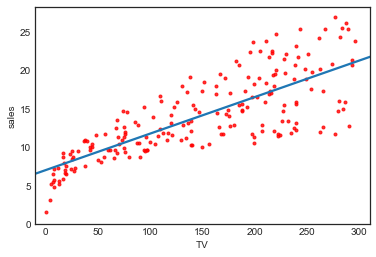

In [3]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

Asumimos que la verdadera relación entre X e Y toma la forma Y = f(X) + error, donde error es un término de error aleatorio con media 0. Si f puede ser aproximada por una función lineal queda
Y = beta_0 + beta_1 * X + error

Asumimos que el término de error no depende de X.

Los coeficientes beta_0 y beta_1 definen la linea de regresión dela población. Estimamos estos coeficientes con beta_0_hat y beta_1_hat dados por la ecuación 3.4

Para calcular los errores standard asociados a los betas, usamos las fórmulas 3.8 donde sigma_cuad es Var(error) .

Para que estas fórmulas sean válidas, asumimos que los errores de cada observación no están correlacionados y tienen la misma varianza sigma_cuad.

El estimador de sigma se llama error standard residual (RSE) y se calcula como

RSE = sqrt(RSS / (n-2))
RSS = suma sobre todas las observaciones de los error_i^2 = suma sobre todas las observaciones de (y - y_estimado)

Los errores standard son usados para calcular el intervalo de confianza.

Test de hipótesis.

H0: beta_1 = 0 (no hay relación entre X e Y)

H1: beta_1 != 0 (hay alguna relación entre X e Y)

Calculamos el estadístico t:
t = (beta_1_estimado - 0) / (error_standard(beta_1_estimado))
tiene distribución t con n-2 grados de libertad

## statsmodels - Ordinary Least Squares (OLS)

In [4]:
est = smf.ols('sales ~ TV', advertising).fit()
#display(est.summary())
display(est.summary().tables[1])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


Esto indica que inviertiendo 1000 adicionales en TV, se obtiene un incremento de ventas en 47.5 unidades

Obtuve los beta de la regresión lineal simple:
    
    y_estimado = coef_Intercept + coef_TV * advertising.TV
    
RSS es la suma, sobre todos las observaciones, del cuadrado de la diferencia entre y_observado, y_estimado

En este ejemplo 'y' es advertising.sales

In [5]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [6]:
# RSS with regression coefficients
RSS = ((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()
RSS

2102.5305831313512

In [7]:
est.rsquared, est.fvalue

(0.611875050850071, 312.1449943727128)

In [8]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           1.47e-42
Time:                        20:30:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mismo análisis usando Scikit-learn

In [9]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


In [10]:
# RSS with regression coefficients
((advertising.sales - (regr.intercept_ + regr.coef_[0]*advertising.TV))**2).sum()

2102.5305831313512

Calculo Rsquared

In [11]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.611875050850071

### Ejercicio 1: Rehacer este análisis de TV para radio y periódico

# Regresion Lineal Múltiple

Test de hipótesis:

H0: beta_1 = beta_2 = beta_p = .... = 0
H1: al menos una beta_j no es 0

F-statistics:
((TSS - RSS) / p) / (RSS / (n-p-1))

RSS es la suma, sobre todos las observaciones, del cuadrado de la diferencia entre y_observado, y_estimado
TSS es la suma, sobre todos las observaciones, del cuadrado de la diferencia entre y_observado, la media de y

Cuando no hay relación entre la respuesta y los predictores, se espera que el valor de F sea cercano a 1.
Si se rechaza H0, se espera que F sea mayor que 1

In [12]:
regr = skl_lm.LinearRegression()

X = advertising[['radio', 'TV']]
y = advertising.sales

regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


In [13]:
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)

0.8971942610828956

In [14]:
# RSS with regression coefficients
((advertising.sales - (regr.intercept_ + regr.coef_[0]*advertising.radio + regr.coef_[1]*advertising.TV))**2).sum()

556.9139800676184

In [15]:
# miro los valores de estadisticos devueltos por statsmodels
est = smf.ols('sales ~ radio + TV', advertising).fit()
#display(est.summary())
display(est.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           4.83e-98
Time:                        20:30:47   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ejercicio 2: Rehacer este análisis de TV usando las tres variables (radio, newspaper, TV) como predictores

### Ejercicio 3: Rehacer este análisis de TV usando como predictores TV, radio, TV*radio
    